# Laptop Price Prediction

### Table of Contents

### Introduction

This notebook performs data preparation of the laptop prices dataset.

In [144]:
# libraries used
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

from scipy import stats
import statsmodels.api as sm
#from scipy.stats import f_oneway


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("laptop_price.csv")

In [3]:
# pandas head() function reveals a lot about the data here
# the data is a mix of data types
# looks like some features can be extracted by splitting some columns,

# Price_euros will be the target feature, making this a supervised learning, or regression, task
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
# no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
# laptop_ID is an identifier
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [7]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


### Selection of functions used

In [96]:
# function to format some of the variable names
def string_format(var):
    if var == "Price_euros":
        return "Price (€)"
    else:
        var_formatted = " ".join(re.findall('[A-Z][^A-Z]*', var))
        return var_formatted  

In [85]:
# histogram plot
def histogram_plot(df, var, bins="auto", h=4, w=6):
    
    title = f"Distribution of {string_format(var)}"

    plt.figure(figsize=(w, h))
    sns.histplot(data=df, x=var, bins=bins)
    

    plt.title(title)
    plt.xlabel(string_format(var))
    plt.ylabel('Count')

    plt.xticks(rotation=45)
    
    plt.show()

In [164]:
def boxplots(df, x, y="Price_euros",h=4, w=10, title_add=""):
    plt.figure(figsize=(w, h))
    sns.boxplot(data=df, x=x, y=y)
    
    plt.xlabel(string_format(x))
    plt.ylabel(y)
    plt.title(f'Comparison of Laptop Prices by {string_format(x)}{title_add}')
    
    
    plt.xticks(rotation=45)
    
    plt.show()

In [119]:
def scatter_plot(df, x, y, h, w):

    title = f"Scatterplot of {x} vs {y}"
    

    plt.figure(figsize=(w, h))
    sns.scatterplot(data=df, x=x, y=y)
    
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)

    plt.show()

### Further exploration and wrangling

The features will be prepared in sequence.

#### Laptop_ID

In [10]:
# laptop_ID is a unique identifier, for some reason it skips some numbers 
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0


In [11]:
# laptop_ID held no signal and is dropped
df = df.drop(["laptop_ID"], axis=1)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### Company

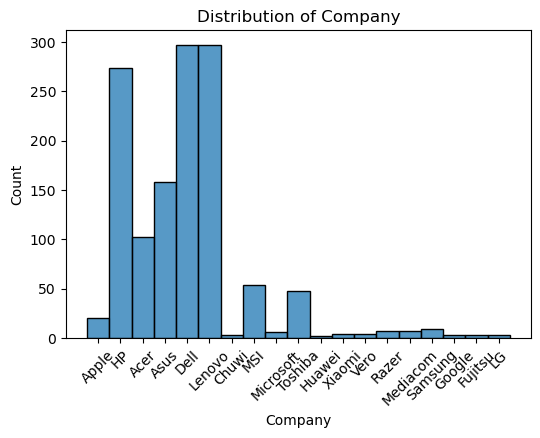

In [86]:
# some companies aren't represented much in the data
# their counts are small enough that a statistical analysis is unpractical

# it's likely that company has effect on price, but also that companies use different parts that influence price



histogram_plot(df, "Company")

In [79]:
# there are 19 unique entries
print("Number of unique companies: ", len(df.Company.unique()))

# some of the entries have a small amount of entries
# they would either need removed or encoded as 'other' etc.
df.Company.value_counts()

Number of unique companies:  19


Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

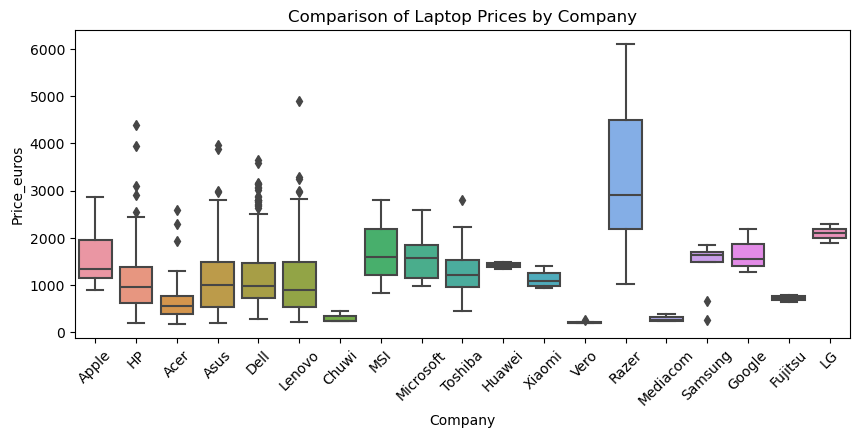

In [150]:
# looking at the distributions a few things are seen:

# 'Razer' stands out as having a large spread, although it only has 7 entries
# suggests that the actual quartile ranges of an average razer laptop isn't captured and more data is needed
# and with more data outliers could be identified

# there is a difference in means which should be investigated
# if there is a statistical significance in the mean differences of some of the categories then 'Company' may be a good indicator of price
# it's also likely that the signal from 'Company' is encoded in other variables like 'Product' 
boxplots(df, "Company")

In [78]:
# the average laptop price is €1123
print("Average laptop price: ", df["Price_euros"].mean())

Average laptop price:  1123.6869915579432


In [84]:
# the mean prices are different
mean_prices = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)

print(mean_prices)

Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1186.068990
Xiaomi       1133.462500
Asus         1104.169367
Lenovo       1086.384444
HP           1067.774854
Fujitsu       729.000000
Acer          626.775825
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64


In [170]:
# value counts df
counts = df['Company'].value_counts()

# filtering companies with less than 20 values
_ = df[df['Company'].isin(counts[counts > 20].index)]

# mean prices run again
# it's likely that there is statistically significant differences here, at least for some values
# which would be enough rational to include company in modelling.. of course smaller valu
companies_with_20 = _.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
print(companies_with_20)

Company
MSI        1728.908148
Apple      1564.198571
Toshiba    1267.812500
Dell       1186.068990
Asus       1104.169367
Lenovo     1086.384444
HP         1067.774854
Acer        626.775825
Name: Price_euros, dtype: float64


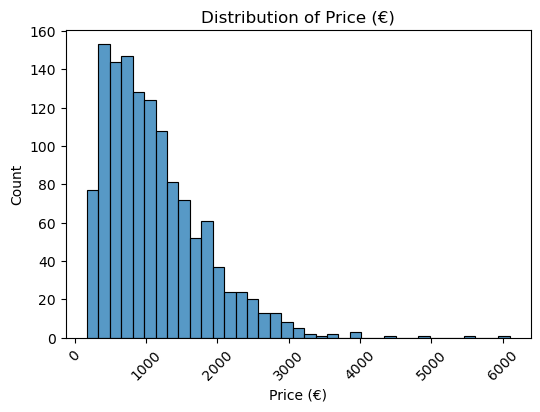

In [148]:
# The above mean values do indicate differences in price
# but we can connuct an ANOVA test on the data to have statistical evidence of different populations
# for this test only the companies that are represented at least 20 times will be used.

# One assumption of ANOVA is normality...
# 'Price_euros' should be log-normal, it is right skewed with outliers (shown in the boxplots above)
histogram_plot(df, "Price_euros")

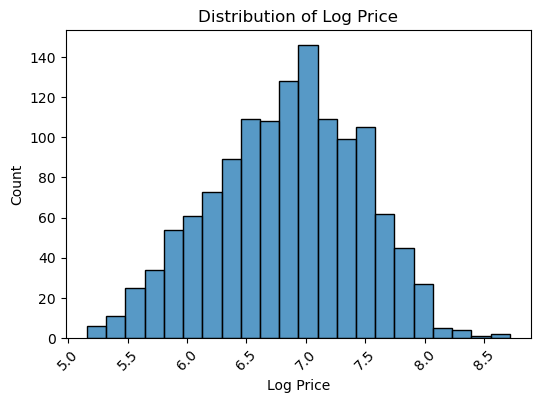

In [152]:
# a log transformation or 'Price_euros' looks normal
df['LogPrice'] = np.log(df['Price_euros'])

histogram_plot(df, "LogPrice")

In [154]:
# a shapiro wilk test is performed
# H0: states the data is normally distributed
# H1: states that the data is not normally distributed

# When conducted on 'LogPrice' a p-value of 3.63e-06 is less than the critical level needed of 0.05...
# ...therefore we reject the null hypothesis and accept the alternative hypothesis
stats.shapiro(df.LogPrice)

ShapiroResult(statistic=0.9925209879875183, pvalue=3.630284027167363e-06)

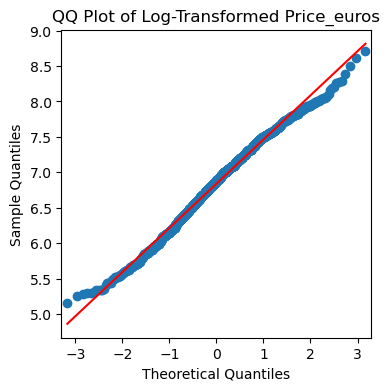

In [145]:
# Price is close to being log-normal and this can be understood better with a Quantile-Quantile plot
# the lower and upper quantiles deviate from normality... which is shown in the histogram above... but harder to visually comprehend there
fig, ax = plt.subplots(figsize=(4, 4))
sm.qqplot(df["Price_euros_log"], line='s', ax=ax)
ax.set_title('QQ Plot of Log-Transformed Price_euros')
plt.show()


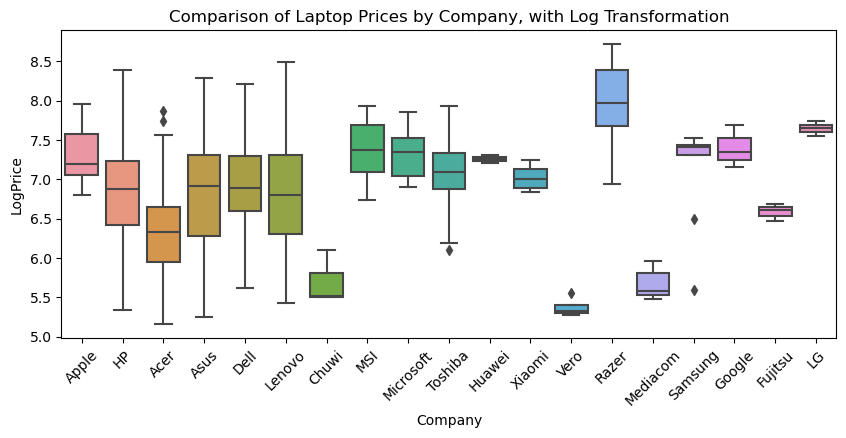

In [167]:
# still it's possible that there may be normallity in some of the categories to perform ANOVA
# when the boxplot is replotted with the log transformation some of the plots do seem normally distributed...
# ...which of course can be tested for
boxplots(df, "Company", y="LogPrice", title_add=", with Log Transformation")

In [181]:
# companies that had more than 20 entries from before
list(companies_with_20.index)

['MSI', 'Apple', 'Toshiba', 'Dell', 'Asus', 'Lenovo', 'HP', 'Acer']

In [180]:
# shapiro wilk tests is conducted on the companies with at least 20 entries
# H0: states the data is normally distributed
# H1: states that the data is not normally distributed

# There is a mix of results and caution should be used to not look to deep for meaningful results...
# ...that support one 

for i in list(companies_with_20.index):
    print(f"Shapiro Wilk test for {i} price")
    print(stats.shapiro(df.LogPrice[df.Company == i]), "\n")

Shapiro Wilk test for MSI price
ShapiroResult(statistic=0.9531937837600708, pvalue=0.03433043137192726) 

Shapiro Wilk test for Apple price
ShapiroResult(statistic=0.9453742504119873, pvalue=0.2777377963066101) 

Shapiro Wilk test for Toshiba price
ShapiroResult(statistic=0.9594073295593262, pvalue=0.0955389142036438) 

Shapiro Wilk test for Dell price
ShapiroResult(statistic=0.9915080666542053, pvalue=0.08532478660345078) 

Shapiro Wilk test for Asus price
ShapiroResult(statistic=0.9735321998596191, pvalue=0.003926434554159641) 

Shapiro Wilk test for Lenovo price
ShapiroResult(statistic=0.9873015880584717, pvalue=0.010329941287636757) 

Shapiro Wilk test for HP price
ShapiroResult(statistic=0.9913017153739929, pvalue=0.10487513244152069) 

Shapiro Wilk test for Acer price
ShapiroResult(statistic=0.9746764302253723, pvalue=0.045162152498960495) 



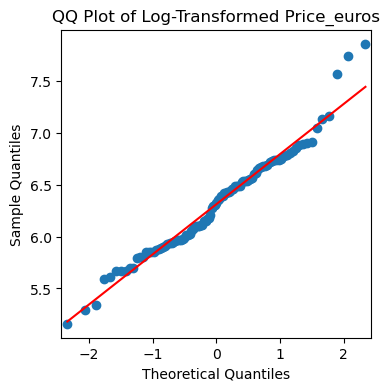

In [191]:
# Acer was close to rejecting the null hypothesis and exhibiting normal distribution
# the boxplot suggests that outliers after the upper quantile could be at fault
# this can be confirmed with a QQ Plot, with those outliers being the largest deviation from normality
fig, ax = plt.subplots(figsize=(4, 4))
sm.qqplot(df[df["Company"]=="Acer"]["Price_euros_log"], line='s', ax=ax)
ax.set_title('QQ Plot of Log-Transformed Price_euros')
plt.show()

In [214]:
# ANOVA will be performed, although it's already suspected that there is difference in the categories according to price...
# ...ANOVA gives evidence that these differences exist statistically

# three values are used
# different combinations could be tested (with adjustments to significance level to account for false positives)
# Apple 

# printing the means of the selected companies for reference}
selected_companies = ['HP', 'Dell', 'Toshiba']
selected_prices = companies_with_20.loc[selected_companies]
print("Mean Prices")
print(selected_prices)

Mean Prices
Company
HP         1067.774854
Dell       1186.068990
Toshiba    1267.812500
Name: Price_euros, dtype: float64


In [211]:
# For ANOVA the following hypothesis are made:
# H0: There is no significance difference in the means (suggesting they came from the one population
# H1: There is significant difference in the means of the compared groups, suggesting at least one group mean is different that the others

# note: Exploration of 'Company' allows insight into the data, but it may be in this case that 'Company' is encoded through 'Product'...
# ... and that the feature can be dropped altogether.. taking the macro view of the products has allowed statistcal insight into the pricing...
# ... of laptops

# note2: domain knowledge of laptop pricing would know that some laptop makers have difference pricing strategies and it wouldn't be expected...
# ... that they would be from the same 'population' and ANOVA is a great way to confirm this

# selecting data to perform ANOVA
dell_prices = df[df["Company"] == "Dell"]["LogPrice"]
toshiba_prices = df[df["Company"] == "Toshiba"]["LogPrice"]
hp_prices = df[df["Company"] == "HP"]["LogPrice"]

# One-way ANOVA
f_statistic, p_value = f_oneway(dell_prices, toshiba_prices, hp_prices)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 6.263581311528418
p-value: 0.002027923785024817


In [218]:
# for now there is no plans to use the LogValue of price
df = df.drop(["LogPrice"], axis=1)

In [221]:
# Razer was
df1 = df[df["Company"] == "Razer"]
df1["Price_euros"].mean()

3346.1428571428573

In [222]:
df1

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price_euros_log
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,6099.0,8.715880
647,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,2599.0,7.862882
778,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,2899.0,7.972121
816,Razer,Blade Stealth,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,1799.0,7.494986
830,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,5499.0,8.612322
1117,Razer,Blade Stealth,Ultrabook,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.25kg,1029.0,6.936343
1231,Razer,Blade Pro,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95kg,3499.0,8.160232
